In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
sns.set_style('whitegrid')

In [4]:
# Load your preprocessed dataset
data = pd.read_parquet('n_forecast_preprocessed.parquet', engine='pyarrow', dtype_backend='numpy_nullable')

# Convert the 'sales_date' column to a datetime type
data['sales_date'] = pd.to_datetime(data['sales_date'])

# Set the sales_date column as the index of the dataframe
data.set_index('sales_date', inplace=True)

In [5]:
data.head()

,store_hashed,n_transactions,store_format,zipcode_region,region,holiday_saint_nicholas,holiday_first_christmas,holiday_liberation_day,holiday_good_friday,holiday_new_years_day,...,holiday_valentines_day,autumn_school_holiday,summer_school_holiday,spring_school_holiday,christmas_school_holiday,may_school_holiday,easter_school_holiday,datetime_store_open,datetime_store_closed,working_hours
sales_date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,b9d487a30398d42ecff55c228ed5652b,6570,19,68,south,0,0,0,0,0,...,0,0,0,0,1,0,0,2019-01-02 08:00:00,2019-01-02 20:00:00,12.0
2019-01-02,c3e0c62ee91db8dc7382bde7419bb573,1773,6,30,middle,0,0,0,0,0,...,0,0,0,0,1,0,0,2019-01-02 08:00:00,2019-01-02 20:00:00,12.0
2019-01-02,90db9da4fc5414ab55a9fe495d555c06,8783,19,10,north,0,0,0,0,0,...,0,0,0,0,1,0,0,2019-01-02 08:00:00,2019-01-02 22:00:00,14.0
2019-01-02,07042ac7d03d3b9911a00da43ce0079a,5391,19,10,north,0,0,0,0,0,...,0,0,0,0,1,0,0,2019-01-02 08:00:00,2019-01-02 22:00:00,14.0
2019-01-02,b60c5ab647a27045b462934977ccad9a,2789,6,96,north,0,0,0,0,0,...,0,0,0,0,1,0,0,2019-01-02 08:00:00,2019-01-02 20:00:00,12.0


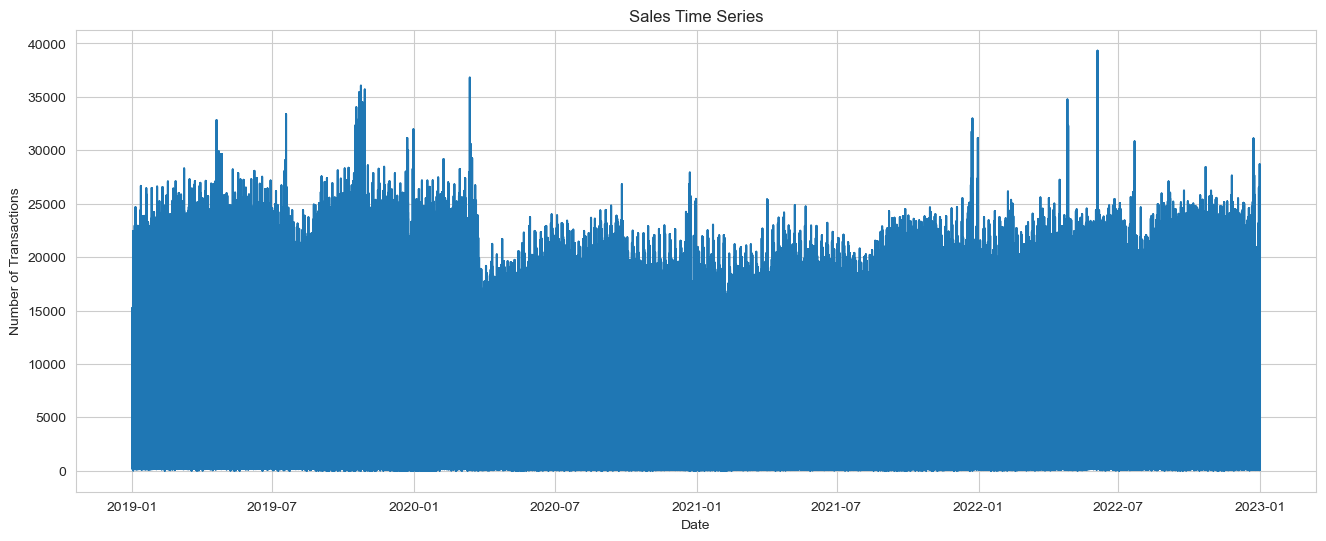

In [8]:
# Create a line plot of the time series
plt.figure(figsize=(16, 6))
plt.plot(data.index, data['n_transactions'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Sales Time Series')
plt.show()

# Time Series Decomposition

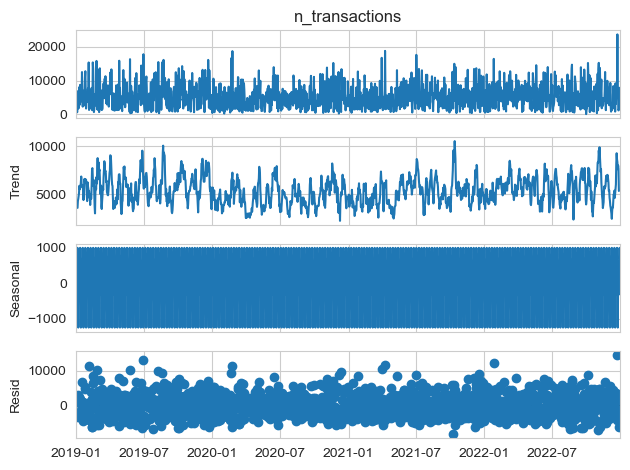

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Remove duplicate labels from the index
data = data[~data.index.duplicated(keep='first')]

# Set the frequency of the dataframe
data = data.asfreq('D')

# Perform time series decomposition
decomposition = seasonal_decompose(data['n_transactions'], model='additive')

# Plot the decomposition
fig = decomposition.plot()
plt.show()


# Anomaly Detection

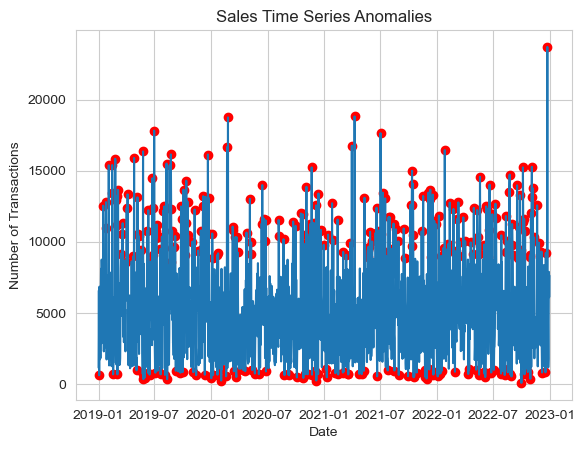

In [12]:
from sklearn.ensemble import IsolationForest

# Fit an isolation forest model to the time series
model = IsolationForest()
model.fit(data['n_transactions'].values.reshape(-1, 1))

# Predict the anomalies
anomalies = model.predict(data['n_transactions'].values.reshape(-1, 1))

# Plot the anomalies
plt.plot(data.index, data['n_transactions'])
plt.scatter(data.index[anomalies == -1], data['n_transactions'][anomalies == -1], color='red')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Sales Time Series Anomalies')
plt.show()

# Autocorrelation Analysis

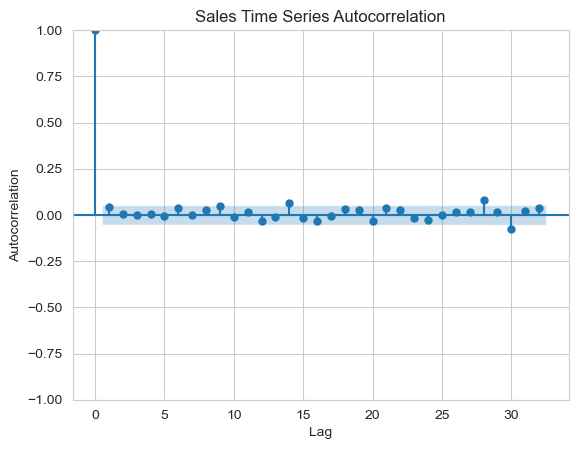

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelation function
plot_acf(data['n_transactions'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Sales Time Series Autocorrelation')
plt.show()

# Spectral Analysis

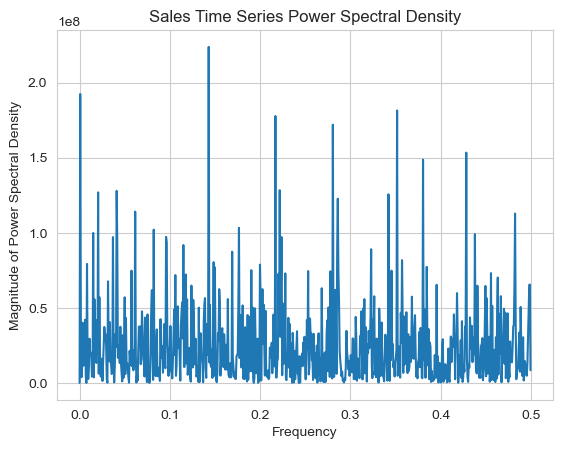

In [15]:
# Compute the power spectral density
frequencies, power_spectrum = periodogram(data['n_transactions'])

# Plot the magnitude of the power spectral density
plt.plot(frequencies, np.abs(power_spectrum))
plt.xlabel('Frequency')
plt.ylabel('Magnitude of Power Spectral Density')
plt.title('Sales Time Series Power Spectral Density')
plt.show()